## Importing the libraries

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## Reading and analysing the data

In [39]:

!git clone https://github.com/vian1608/Customer-Segmentation-Project

df = pd.read_csv('Customer-Segmentation-Project/Mall_Customers.csv')


fatal: destination path 'Customer-Segmentation-Project' already exists and is not an empty directory.


In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.drop('CustomerID', axis=1, inplace=True)
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [42]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Plotting various exploratory graphs to derive an understanding of the all customers

Text(12.334999999999994, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

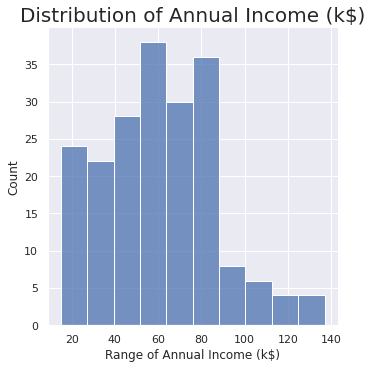

In [43]:
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.displot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(12.334999999999994, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

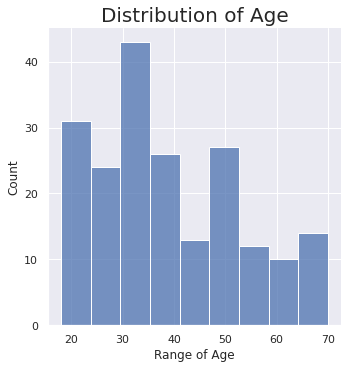

In [44]:
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.displot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(12.334999999999994, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

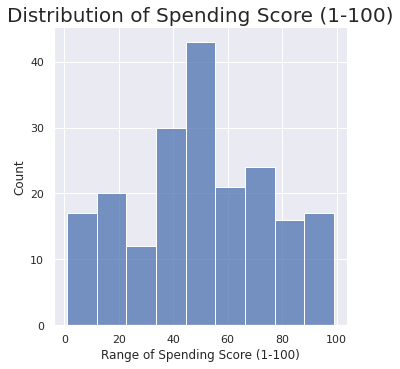

In [45]:
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.displot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

In [46]:
z = df.groupby(['Gender']).size().reset_index(name='count')
pieChart = px.pie(z, values='count', names='Gender', 
                  title='Distribution of Gender on dataset',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [47]:
fig = px.scatter_3d(df, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Gender')
fig.show()

### We may be able to identify 5 clusters here

## Applying k-mean clustering

In [48]:
X = df.iloc[:,2:4].values

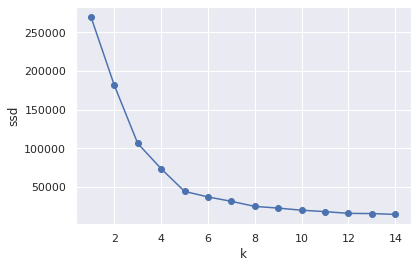

In [49]:
ssd = []

K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500)
    kmean = kmean.fit(X)
    ssd.append(kmean.inertia_)

plt.plot(K, ssd, marker='o')
plt.xlabel('k')
plt.ylabel('ssd')
plt.show()


In [50]:
for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("cluster={}, The silhouette Coeff = {}".format(n_cluster, sil_coeff))


cluster=2, The silhouette Coeff = 0.2968969162503008
cluster=3, The silhouette Coeff = 0.46761358158775435
cluster=4, The silhouette Coeff = 0.4931963109249047
cluster=5, The silhouette Coeff = 0.553931997444648
cluster=6, The silhouette Coeff = 0.5379675585622219
cluster=7, The silhouette Coeff = 0.5288104473798049
cluster=8, The silhouette Coeff = 0.459295844567539
cluster=9, The silhouette Coeff = 0.457462901394195
cluster=10, The silhouette Coeff = 0.4435562345732022
cluster=11, The silhouette Coeff = 0.44581460933978173
cluster=12, The silhouette Coeff = 0.4273983046941792
cluster=13, The silhouette Coeff = 0.43417286241159997
cluster=14, The silhouette Coeff = 0.4337399042070637


kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10)
clusters = kmeans.fit_predict(X)


finaldata = df.copy()
finaldata['Cluster'] = clusters
fig = px.scatter_3d(finaldata, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Cluster', opacity = 0.8)
fig.show()

# New Section

In [51]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10)
clusters = kmeans.fit_predict(X)


finaldata = df.copy()
finaldata['Cluster'] = clusters
fig = px.scatter_3d(finaldata, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Cluster', opacity = 0.8)
fig.show()

In [52]:
finaldata.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1
